### TASK

Below is test data for schedule of worker in assembly line the second shift. 
The description contains  information in the format of "Monday, Use STREAM1 materials to  perform  ACTION1 CATEGORY1 SUBCATEGORY1"
Create short a python function with below functionality.

1) Read the file and create summary table to calculate total time spend By TaskType, Stream
2) Also within each stream calculate what is time spend on each Action , Category and Subcategory.
3) Store the result in a text file/csv.
4) Use visualization package to view the result in various stacked column chart and bar chart/pie and store the image in jpeg.

#### 1) Read the file and create summary table to calculate total time spend By TaskType, Stream

In [304]:
import pandas as pd
df = pd.read_csv("test_data.csv", sep='\t')

In [306]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 8 columns):
TaskType       24 non-null object
Start Date     24 non-null object
Start Time     24 non-null object
End Date       24 non-null object
 End Time      24 non-null object
Description    24 non-null object
ID             24 non-null int64
Unnamed: 7     0 non-null float64
dtypes: float64(1), int64(1), object(6)
memory usage: 1.6+ KB


In [307]:
print(df["Description"])

0     Monday, Use STREAM1 materials to  perform  ACTION1 CATEGORY1 SUBCATEGORY1
1     Monday, Use STREAM1 materials to  perform  ACTION1 CATEGORY1 SUBCATEGORY2
2     Monday, Use STREAM1 materials to  perform  ACTION1 CATEGORY1 SUBCATEGORY3
3     Monday, Use STREAM1 materials to  perform  ACTION1 CATEGORY2 SUBCATEGORY1
4     Monday, Use STREAM1 materials to  perform  ACTION1 CATEGORY2 SUBCATEGORY2
5     Monday, Use STREAM1 materials to  perform  ACTION1 CATEGORY2 SUBCATEGORY3
6     Monday, Use STREAM1 materials to  perform  ACTION2 CATEGORY1 SUBCATEGORY1
7     Monday, Use STREAM1 materials to  perform  ACTION2 CATEGORY1 SUBCATEGORY2
8     Monday, Use STREAM1 materials to  perform  ACTION2 CATEGORY1 SUBCATEGORY3
9     Monday, Use STREAM1 materials to  perform  ACTION2 CATEGORY2 SUBCATEGORY1
10    Monday, Use STREAM1 materials to  perform  ACTION2 CATEGORY2 SUBCATEGORY2
11    Monday, Use STREAM1 materials to  perform  ACTION2 CATEGORY2 SUBCATEGORY3
12    Monday, Use STREAM2 materials to  

In [308]:
# Create new column to store the duration (end time - start time)
df.insert(5, "duration", None)
df.head()


,TaskType,Start Date,Start Time,End Date,End Time,duration,Description,ID,Unnamed: 7
0,TaskType1,Nov 05 2018,16:30,Nov 05 2018,16:40,None,"Monday, Use STREAM1 materials to perform ACTION1 CATEGORY1 SUBCATEGORY1",4,NaN
1,TaskType1,Nov 06 2018,16:30,Nov 06 2018,21:40,None,"Monday, Use STREAM1 materials to perform ACTION1 CATEGORY1 SUBCATEGORY2",5,NaN
2,TaskType1,Nov 07 2018,16:30,Nov 07 2018,19:40,None,"Monday, Use STREAM1 materials to perform ACTION1 CATEGORY1 SUBCATEGORY3",6,NaN
3,TaskType1,Nov 08 2018,16:30,Nov 08 2018,16:40,None,"Monday, Use STREAM1 materials to perform ACTION1 CATEGORY2 SUBCATEGORY1",7,NaN
4,TaskType1,Nov 09 2018,16:30,Nov 09 2018,21:40,None,"Monday, Use STREAM1 materials to perform ACTION1 CATEGORY2 SUBCATEGORY2",8,NaN


In [309]:
#Time taken by each tasktype
df["duration"] = pd.to_datetime(df[" End Time"]) - pd.to_datetime(df["Start Time"])
df


,TaskType,Start Date,Start Time,End Date,End Time,duration,Description,ID,Unnamed: 7
0,TaskType1,Nov 05 2018,16:30,Nov 05 2018,16:40,00:10:00,"Monday, Use STREAM1 materials to perform ACTION1 CATEGORY1 SUBCATEGORY1",4,NaN
1,TaskType1,Nov 06 2018,16:30,Nov 06 2018,21:40,05:10:00,"Monday, Use STREAM1 materials to perform ACTION1 CATEGORY1 SUBCATEGORY2",5,NaN
2,TaskType1,Nov 07 2018,16:30,Nov 07 2018,19:40,03:10:00,"Monday, Use STREAM1 materials to perform ACTION1 CATEGORY1 SUBCATEGORY3",6,NaN
3,TaskType1,Nov 08 2018,16:30,Nov 08 2018,16:40,00:10:00,"Monday, Use STREAM1 materials to perform ACTION1 CATEGORY2 SUBCATEGORY1",7,NaN
4,TaskType1,Nov 09 2018,16:30,Nov 09 2018,21:40,05:10:00,"Monday, Use STREAM1 materials to perform ACTION1 CATEGORY2 SUBCATEGORY2",8,NaN
5,TaskType1,Nov 10 2018,16:30,Nov 10 2018,19:40,03:10:00,"Monday, Use STREAM1 materials to perform ACTION1 CATEGORY2 SUBCATEGORY3",9,NaN
6,TaskType1,Nov 05 2018,20:30,Nov 05 2018,22:40,02:10:00,"Monday, Use STREAM1 materials to perform ACTION2 CATEGORY1 SUBCATEGORY1",10,NaN
7,TaskType1,Nov 06 2018,20:30,Nov 06 2018,22:40,02:10:00,"Monday, Use STREAM1 materials to perform ACTION2 CATEGORY1 SUBCATEGORY2",11,NaN
8,TaskType1,Nov 07 2018,20:30,Nov 07 2018,22:40,02:10:00,"Monday, Use STREAM1 materials to perform ACTION2 CATEGORY1 SUBCATEGORY3",12,NaN
9,TaskType1,Nov 08 2018,20:30,Nov 08 2018,22:40,02:10:00,"Monday, Use STREAM1 materials to perform ACTION2 CATEGORY2 SUBCATEGORY1",13,NaN


In [310]:
# Total time spend by TaskType1
# To start storing the summary data, create an empty data dictionary
data_dict = {}

t1_df = df.loc[df['TaskType'].isin(["TaskType1"])]
time_t1 = t1_df.duration.sum()
#fetch the time in hours
data_dict["time_t1"] = [time_t1.value*(10**-9)/3600]
print("Total time spent by TaskType1 = ",time_t1)

Total time spent by TaskType1 =  2 days 12:00:00


In [311]:
# Total Time taken by task1 stream1
s1_df = t1_df[t1_df.Description.str.match('.*STREAM1.*')]
time_t1_s1 = s1_df.duration.sum()
data_dict["time_t1_s1"] = [time_t1_s1.value*(10**-9)/3600]
print("Total time spent by TaskType1 stream1 = ",time_t1_s1)

Total time spent by TaskType1 stream1 =  1 days 06:00:00


In [312]:
# Total Time taken by task1 stream2
s2_df = t1_df[t1_df.Description.str.match('.*STREAM2.*')]
time_t1_s2 = s2_df.duration.sum()

data_dict["time_t1_s2"] = [time_t1_s2.value*(10**-9)/3600]
print("Total time spent by TaskType1 stream2 = ",time_t1_s2)


Total time spent by TaskType1 stream2 =  1 days 06:00:00


#### 2) Also within each stream calculate what is time spend on each Action , Category and Subcategory.       

##### stream1 Data

In [313]:
#time spent on each action1 and action2 in stream1
s1_a1_df = s1_df[t1_df.Description.str.match('.*ACTION1.*')]
s1_a2_df = s1_df[t1_df.Description.str.match('.*ACTION2.*')]

time_t1_s1_a1 = s1_a1_df.duration.sum()
time_t1_s1_a2 = s1_a2_df.duration.sum()

data_dict["time_t1_s1_a1"] = [time_t1_s1_a1.value*(10**-9)/3600]
data_dict["time_t1_s1_a2"] = [time_t1_s1_a2.value*(10**-9)/3600]

print("Total time spent by TaskType1 stream1 action1 = ",time_t1_s1_a1)
print("Total time spent by TaskType1 stream1 action2 = ",time_t1_s1_a2)

Total time spent by TaskType1 stream1 action1 =  0 days 17:00:00
Total time spent by TaskType1 stream1 action2 =  0 days 13:00:00


/Users/swetha/anaconda2/envs/python35/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/swetha/anaconda2/envs/python35/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [314]:
#time spent on each category1 and category2 in stream1
s1_c1_df = s1_df[t1_df.Description.str.match('.*CATEGORY1.*')]
s1_c2_df = s1_df[t1_df.Description.str.match('.*CATEGORY2.*')]

time_t1_s1_c1 = s1_c1_df.duration.sum()
time_t1_s1_c2 = s1_c2_df.duration.sum()

data_dict["time_t1_s1_c1"] = [time_t1_s1_c1.value*(10**-9)/3600]
data_dict["time_t1_s1_c2"] = [time_t1_s1_c2.value*(10**-9)/3600]

print("Total time spent by TaskType1 stream1 category1 = ",time_t1_s1_c1)
print("Total time spent by TaskType1 stream1 category2 = ",time_t1_s1_c2)

Total time spent by TaskType1 stream1 category1 =  0 days 17:20:00
Total time spent by TaskType1 stream1 category2 =  0 days 22:20:00


/Users/swetha/anaconda2/envs/python35/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/swetha/anaconda2/envs/python35/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [315]:
#time spent on each subcategory1 subcategory2 and subcategory3 in stream1
s1_sb1_df = s1_df[t1_df.Description.str.match('.*SUBCATEGORY1.*')]
s1_sb2_df = s1_df[t1_df.Description.str.match('.*SUBCATEGORY2.*')]
s1_sb3_df = s1_df[t1_df.Description.str.match('.*SUBCATEGORY3.*')]

time_t1_s1_sb1 = s1_sb1_df.duration.sum()
time_t1_s1_sb2 = s1_sb2_df.duration.sum()
time_t1_s1_sb3 = s1_sb3_df.duration.sum()

data_dict["time_t1_s1_sb1"] = [time_t1_s1_sb1.value*(10**-9)/3600]
data_dict["time_t1_s1_sb2"] = [time_t1_s1_sb2.value*(10**-9)/3600]
data_dict["time_t1_s1_sb3"] = [time_t1_s1_sb3.value*(10**-9)/3600]

print("Total time spent by TaskType1 stream1 subcategory1 = ",time_t1_s1_sb1)
print("Total time spent by TaskType1 stream1 subcategory2 = ",time_t1_s1_sb2)
print("Total time spent by TaskType1 stream1 subcategory3 = ",time_t1_s1_sb3)


Total time spent by TaskType1 stream1 subcategory1 =  0 days 04:40:00
Total time spent by TaskType1 stream1 subcategory2 =  0 days 14:40:00
Total time spent by TaskType1 stream1 subcategory3 =  0 days 10:40:00


/Users/swetha/anaconda2/envs/python35/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/swetha/anaconda2/envs/python35/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/swetha/anaconda2/envs/python35/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


##### stream2 Data

In [316]:
#time spent on each action1 and action2 in stream2
s2_a1_df = s2_df[t1_df.Description.str.match('.*ACTION1.*')]
s2_a2_df = s2_df[t1_df.Description.str.match('.*ACTION2.*')]

time_t1_s2_a1 = s2_a1_df.duration.sum()
time_t1_s2_a2 = s2_a2_df.duration.sum()

data_dict["time_t1_s2_a1"] = [time_t1_s2_a1.value*(10**-9)/3600]
data_dict["time_t1_s2_a2"] = [time_t1_s2_a2.value*(10**-9)/3600]

print("Total time spent by TaskType1 stream2 action1 = ",time_t1_s2_a1)
print("Total time spent by TaskType1 stream2 action2 = ",time_t1_s2_a2)

Total time spent by TaskType1 stream2 action1 =  0 days 17:00:00
Total time spent by TaskType1 stream2 action2 =  0 days 13:00:00


/Users/swetha/anaconda2/envs/python35/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/swetha/anaconda2/envs/python35/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [317]:
#time spent on each category1 and category2 in stream2
s2_c1_df = s2_df[t1_df.Description.str.match('.*CATEGORY1.*')]
s2_c2_df = s2_df[t1_df.Description.str.match('.*CATEGORY2.*')]

time_t1_s2_c1 = s2_c1_df.duration.sum()
time_t1_s2_c2 = s2_c2_df.duration.sum()

data_dict["time_t1_s2_c1"] = [time_t1_s2_c1.value*(10**-9)/3600]
data_dict["time_t1_s2_c2"] = [time_t1_s2_c2.value*(10**-9)/3600]

print("Total time spent by TaskType1 stream2 category1 = ",time_t1_s2_c1)
print("Total time spent by TaskType1 stream2 category2 = ",time_t1_s2_c2)

Total time spent by TaskType1 stream2 category1 =  0 days 17:20:00
Total time spent by TaskType1 stream2 category2 =  0 days 22:20:00


/Users/swetha/anaconda2/envs/python35/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/swetha/anaconda2/envs/python35/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [318]:
#time spent on each subcategory1 subcategory2 and subcategory3 in stream1
s2_sb1_df = s2_df[t1_df.Description.str.match('.*SUBCATEGORY1.*')]
s2_sb2_df = s2_df[t1_df.Description.str.match('.*SUBCATEGORY2.*')]
s2_sb3_df = s2_df[t1_df.Description.str.match('.*SUBCATEGORY3.*')]

time_t1_s2_sb1 = s2_sb1_df.duration.sum()
time_t1_s2_sb2 = s2_sb2_df.duration.sum()
time_t1_s2_sb3 = s2_sb3_df.duration.sum()

data_dict["time_t1_s2_sb1"] = [time_t1_s2_sb1.value*(10**-9)/3600]
data_dict["time_t1_s2_sb2"] = [time_t1_s2_sb2.value*(10**-9)/3600]
data_dict["time_t1_s2_sb3"] = [time_t1_s2_sb3.value*(10**-9)/3600]

print("Total time spent by TaskType1 stream2 subcategory1 = ",time_t1_s2_sb1)
print("Total time spent by TaskType1 stream2 subcategory2 = ",time_t1_s2_sb2)
print("Total time spent by TaskType1 stream2 subcategory3 = ",time_t1_s2_sb3)

Total time spent by TaskType1 stream2 subcategory1 =  0 days 04:40:00
Total time spent by TaskType1 stream2 subcategory2 =  0 days 14:40:00
Total time spent by TaskType1 stream2 subcategory3 =  0 days 10:40:00


/Users/swetha/anaconda2/envs/python35/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/swetha/anaconda2/envs/python35/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/swetha/anaconda2/envs/python35/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [319]:
row_labels = ["Duration in Hrs"]
summary_table = pd.DataFrame(data = data_dict, index = row_labels)
summary_table = summary_table.T
summary_table

,Duration in Hrs
time_t1,60.000000
time_t1_s1,30.000000
time_t1_s1_a1,17.000000
time_t1_s1_a2,13.000000
time_t1_s1_c1,17.333333
time_t1_s1_c2,22.333333
time_t1_s1_sb1,4.666667
time_t1_s1_sb2,14.666667
time_t1_s1_sb3,10.666667
time_t1_s2,30.000000


time_t1	       : time taken for TaskType1  

time_t1_s1	   : time taken for TaskType1 STREAM1
time_t1_s1_a1  : time taken for TaskType1 STREAM1 Action1	
time_t1_s1_a2  : time taken for TaskType1 STREAM1 Action2	
time_t1_s1_c1  : time taken for TaskType1 STREAM1 Category1
time_t1_s1_c2  : time taken for TaskType1 STREAM1 Category1
time_t1_s1_sb1 : time taken for TaskType1 STREAM1 SubCategory1
time_t1_s1_sb2 : time taken for TaskType1 STREAM1 SubCategory2
time_t1_s1_sb3 : time taken for TaskType1 STREAM1 SubCategory3

time_t1_s2     : time taken for TaskType1 STREAM2
time_t1_s2_a1  : time taken for TaskType1 STREAM2 Action1
time_t1_s2_a2  : time taken for TaskType1 STREAM2 Action2
time_t1_s2_c1  : time taken for TaskType1 STREAM2 Category1
time_t1_s2_c2  : time taken for TaskType1 STREAM2 Category1
time_t1_s2_sb1 : time taken for TaskType1 STREAM2 SubCategory1
time_t1_s2_sb2 : time taken for TaskType1 STREAM2 SubCategory2
time_t1_s2_sb3 : time taken for TaskType1 STREAM2 SubCategory3

#### 3) Store the result in a text file/csv.

In [320]:
summary_table.to_csv("duration_summary.csv")

#### 4) Use visualization package to view the result in various stacked column chart and bar chart/pie and store the image in jpeg.

In [331]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('classic')

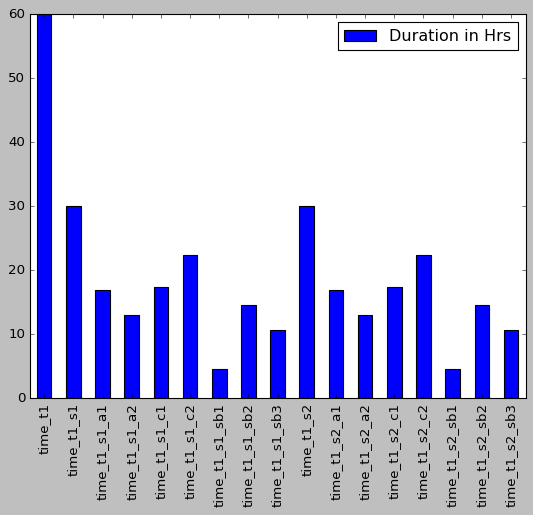

In [333]:
# Bar chart
fig1 = summary_table.plot.bar()
fig1 = fig1.get_figure()
fig1.savefig("bar_graph.png")
im = Image.open("bar_graph.png")
rgb_im = im.convert('RGB')
rgb_im.save('bar_graph.jpg')


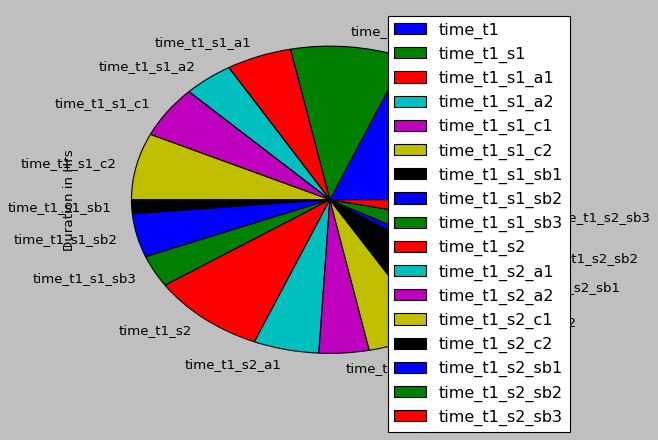

In [334]:
#Pie chart
fig2 = summary_table.plot.pie(subplots=True)
fig2 = fig2[0].get_figure()
fig2.savefig("pie_chart_graph.png")

im = Image.open("pie_chart_graph.png")
rgb_im = im.convert('RGB')
rgb_im.save('pie_chart_graph.jpeg')